In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=100, centers=5, random_state=10)
#X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)

In [3]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

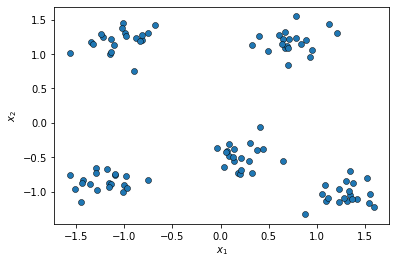

In [4]:
plot_data(X)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [6]:
def plot_clusters(X, labels, centroids):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], palette='tab10', 
                    marker='x', color='k', s=100, legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

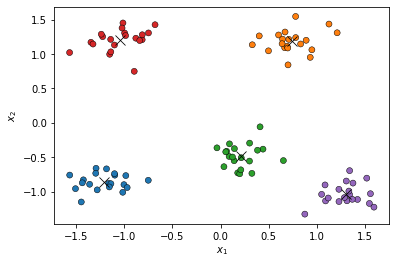

In [7]:
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_)
plt.savefig('figures/blobs_kmeans_sklearn.pdf')

In [8]:
print(kmeans.inertia_)

6.154048637438845


Voronoi diagram

In [9]:
def plot_voronoi_diagram(clusterer, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), colors='k')
    
    plt.scatter(X[:, 0], X[:, 1], color='k', s=20)
    centroids = clusterer.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

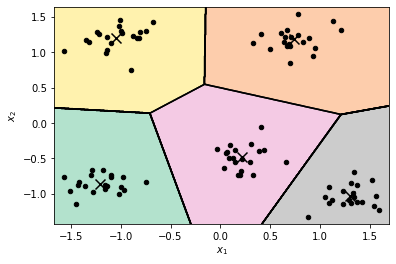

In [10]:
plot_voronoi_diagram(kmeans, X)
plt.savefig('figures/voronoi_diagram.pdf')

The elbow method

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


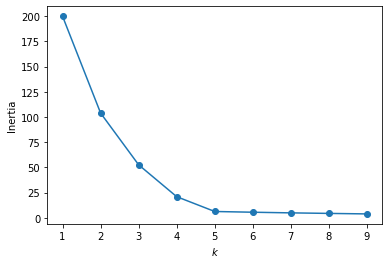

In [11]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(np.arange(1, 10), inertias, 'o-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.savefig('figures/elbow_method.pdf')

Kmeans Limitations

In [12]:
def plot_data_with_color(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

Unevenly Sized Clusters

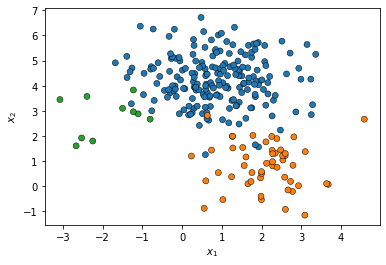

In [13]:
X, y = make_blobs(n_samples=1000, random_state=0)
X_reduced = np.vstack((X[y == 0][:200], X[y == 1][:50], X[y == 2][:10])) 
y_reduced = [0] * 200 + [1] * 50 + [2] * 10
plot_data_with_color(X_reduced, y_reduced)
plt.savefig('figures/blobs_unevenly_sized.pdf')

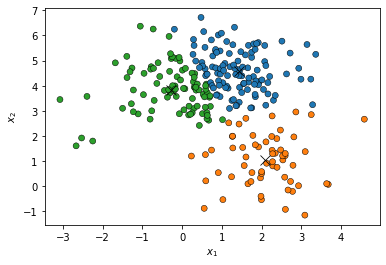

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_reduced)
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_)
plt.savefig('figures/blobs_unevenly_sized_kmeans.pdf')

Unequal Variance

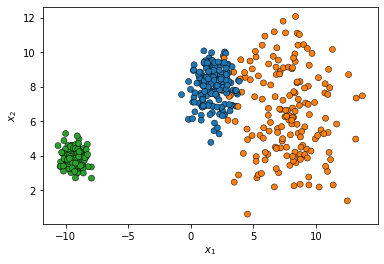

In [15]:
X_varied, y_varied = make_blobs(n_samples=500, cluster_std=[1, 2.5, 0.5], random_state=20)
plot_data_with_color(X_varied, y_varied)
plt.savefig('figures/blobs_unequal_variance.pdf')

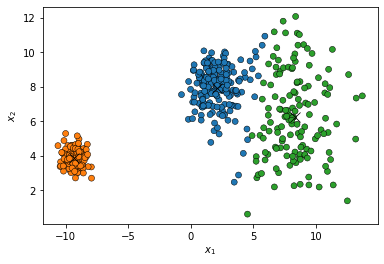

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_varied)
plot_clusters(X_varied, kmeans.labels_, kmeans.cluster_centers_)
plt.savefig('figures/blobs_unequal_variance_kmeans.pdf')

Non-Globular Shapes


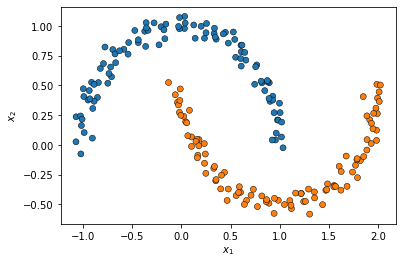

In [17]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=0)
plot_data_with_color(X_moons, y_moons)
plt.savefig('figures/moons_data.pdf')

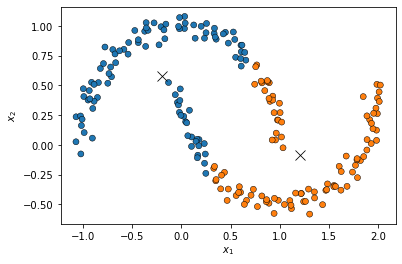

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_moons)
plot_clusters(X_moons, kmeans.labels_, kmeans.cluster_centers_)
plt.savefig('figures/moons_kmeans.pdf')